<a href="https://colab.research.google.com/github/jaskeeratbhatia/covid-19-data-visulaization/blob/master/covid-19-data-25-may-2020-revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px ### for plotting the data on world map

In [41]:
path = 'https://api.covid19india.org/csv/latest/district_wise.csv'
df = pd.read_csv(path)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 16 columns):
SlNo               801 non-null int64
State_Code         801 non-null object
State              801 non-null object
District_Key       801 non-null object
District           801 non-null object
Confirmed          801 non-null int64
Active             801 non-null int64
Recovered          801 non-null int64
Deceased           801 non-null int64
Migrated_Other     801 non-null int64
Delta_Confirmed    801 non-null int64
Delta_Active       801 non-null int64
Delta_Recovered    801 non-null int64
Delta_Deceased     801 non-null int64
District_Notes     66 non-null object
Last_Updated       0 non-null float64
dtypes: float64(1), int64(10), object(5)
memory usage: 100.2+ KB


,SlNo,State_Code,State,District_Key,District,Confirmed,Active,Recovered,Deceased,Migrated_Other,Delta_Confirmed,Delta_Active,Delta_Recovered,Delta_Deceased,District_Notes,Last_Updated
0,0,UN,State Unassigned,UN_Unassigned,Unassigned,0,0,0,0,0,0,0,0,0,NaN,NaN
1,1,AN,Andaman and Nicobar Islands,AN_Nicobars,Nicobars,0,0,0,0,0,0,0,0,0,District-wise numbers are out-dated as cumulat...,NaN
2,2,AN,Andaman and Nicobar Islands,AN_North and Middle Andaman,North and Middle Andaman,1,0,1,0,0,0,0,0,0,District-wise numbers are out-dated as cumulat...,NaN
3,3,AN,Andaman and Nicobar Islands,AN_South Andaman,South Andaman,51,19,32,0,0,0,0,0,0,District-wise numbers are out-dated as cumulat...,NaN
4,0,AP,Andhra Pradesh,AP_Foreign Evacuees,Foreign Evacuees,434,0,434,0,0,0,0,0,0,NaN,NaN


In [42]:
df.drop([ 'SlNo','State_Code','District_Key',], axis=1, inplace=True)
df.rename(columns={'State': "State Name"}, inplace=True)
df.head()


,State Name,District,Confirmed,Active,Recovered,Deceased,Migrated_Other,Delta_Confirmed,Delta_Active,Delta_Recovered,Delta_Deceased,District_Notes,Last_Updated
0,State Unassigned,Unassigned,0,0,0,0,0,0,0,0,0,NaN,NaN
1,Andaman and Nicobar Islands,Nicobars,0,0,0,0,0,0,0,0,0,District-wise numbers are out-dated as cumulat...,NaN
2,Andaman and Nicobar Islands,North and Middle Andaman,1,0,1,0,0,0,0,0,0,District-wise numbers are out-dated as cumulat...,NaN
3,Andaman and Nicobar Islands,South Andaman,51,19,32,0,0,0,0,0,0,District-wise numbers are out-dated as cumulat...,NaN
4,Andhra Pradesh,Foreign Evacuees,434,0,434,0,0,0,0,0,0,NaN,NaN


In [43]:
### group the data by state

world = df.groupby("State Name")['Confirmed','Active','Recovered','Deceased'].sum().reset_index()
world.head()

,State Name,Confirmed,Active,Recovered,Deceased
0,Andaman and Nicobar Islands,3848,172,3623,53
1,Andhra Pradesh,700235,57858,636508,5869
2,Arunachal Pradesh,10020,2955,7049,16
3,Assam,182396,34114,147519,711
4,Bihar,185707,12432,172364,910


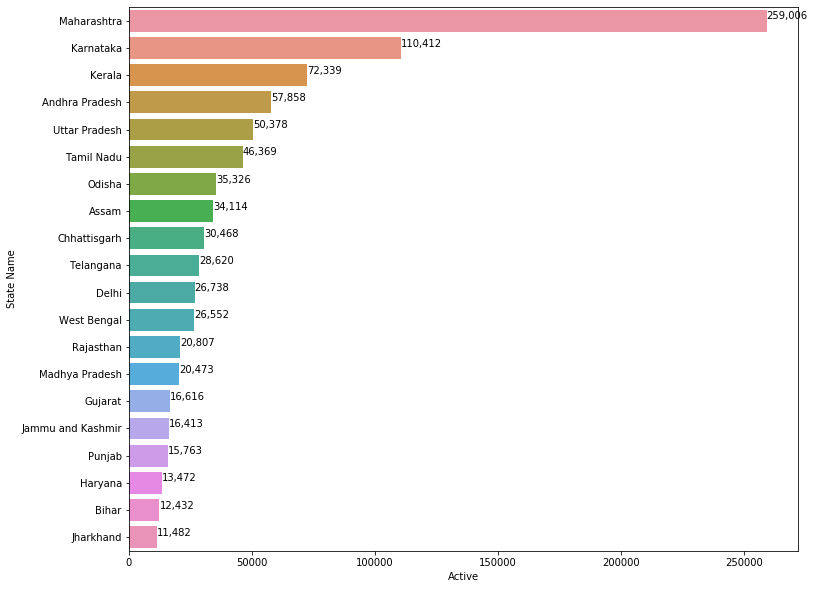

In [44]:
### Find top 20 countries with maximum number of confirmed cases
top_20 = world.sort_values(by=['Active'], ascending=False).head(20)
### Generate a Barplot
plt.figure(figsize=(12,10))
plot = sns.barplot(top_20['Active'], top_20['State Name'])
for i,(value,name) in enumerate(zip(top_20['Active'],top_20['State Name'])):
  plot.text(value,i-0.05,f'{value:,.0f}',size=10)
plt.show()

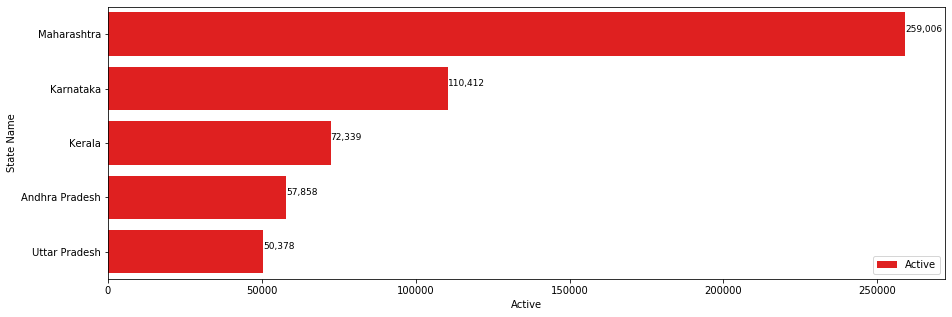

In [48]:
top_5 = world.sort_values(by=['Active'], ascending=False).head()

plt.figure(figsize=(15,5))
active = sns.barplot(top_5['Active'], top_5['State Name'], color = 'red', label='Active')

### Adding Texts for barplots
for i,(value,name) in enumerate(zip(top_5['Active'],top_5['State Name'])):
  active.text(value,i-0.05,f'{value:,.0f}',size=9)
plt.legend(loc=4)
plt.show()
